<a href="https://colab.research.google.com/github/suvarnanitish/INSE-6220/blob/main/Raisin_Size_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis and Raisin Size Prediction**

Install Pycaret

In [4]:
!pip install pycaret==2.3.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:

print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/suvarnanitish/INSE-6220/4322ec195d21eb0a52724101c4e7b118daf028f9/Raisin%20Data.csv')
df.head(50)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   87524       442.246011       253.291155      0.819738       90546   
1   75166       406.690687       243.032436      0.801805       78789   
2   90856       442.267048       266.328318      0.798354       93717   
3   45928       286.540559       208.760042      0.684989       47336   
4   79408       352.190770       290.827533      0.564011       81463   
5   49242       318.125407       200.122120      0.777351       51368   
6   42492       310.146072       176.131449      0.823099       43904   
7   60952       332.455472       235.429835      0.706058       62329   
8   42256       323.189607       172.575926      0.845499       44743   
9   64380       366.964842       227.771615      0.784056       66125   
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   
20  69726       354.176912       252.529208      0.701161       71849   
21  57346       330.478438       222.443748      0.739555       59365   
22  82028       397.114976       268.333773      0.737169       84427   
23  61251       301.507790       273.659941      0.419754       64732   
24  96277       447.134523       275.216154      0.788128       97865   
25  75620       368.224284       263.459255      0.698627       77493   
26  73167       340.055218       276.015177      0.584106       74545   
27  60847       336.923870       231.465696      0.726660       62492   
28  81021       347.750058       297.640626      0.517135       82552   
29  59902       358.591915       222.902027      0.783332       63250   
30  88745       429.770355       265.690236      0.786009       90715   
31  41809       307.532739       175.085568      0.822114       43838   
32  75329       364.230780       265.866864      0.683510       77541   
33  61600       350.182754       225.842771      0.764243       63397   
34  46427       253.842028       235.906824      0.369212       48275   
35  40861       249.740227       213.573272      0.518328       43096   
36  55827       305.298843       234.661225      0.639696       57724   
37  54182       366.066674       192.013274      0.851391       56450   
38  77468       405.936594       245.989798      0.795479       79220   
39  49882       287.264327       222.185873      0.633852       50880   
40  95245       397.094114       307.273922      0.633422       97988   
41  71464       364.103090       253.796927      0.717026       73265   
42  77055       375.250132       262.812422      0.713784       79255   
43  92384       368.406214       320.714579      0.492087       93772   
44  77310       436.529899       228.280372      0.852367       80138   
45  57580       330.228375       232.055387      0.711475       60232   
46  69708       375.447280       239.132775      0.770924       71321   
47  41502       260.512675       205.865024      0.612810       43114   
48  45800       330.008683       181.665865      0.834843       47802   
49  52623       311.996758       218.041123      0.715261       54175   

      Extent  Perimeter  Class  
0   0.758651   1184.040      1  
1   0.684130   1121.786      1  
2   0.637613   1208.575      1  
3   0.699599    844.162      1  
4   0.792772   1073.251      1  
5   0.658456    881.836      1  
6   0.665894    823.796      1  
7   0.743598    9

In [9]:
len(df.index)


900

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [11]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [12]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


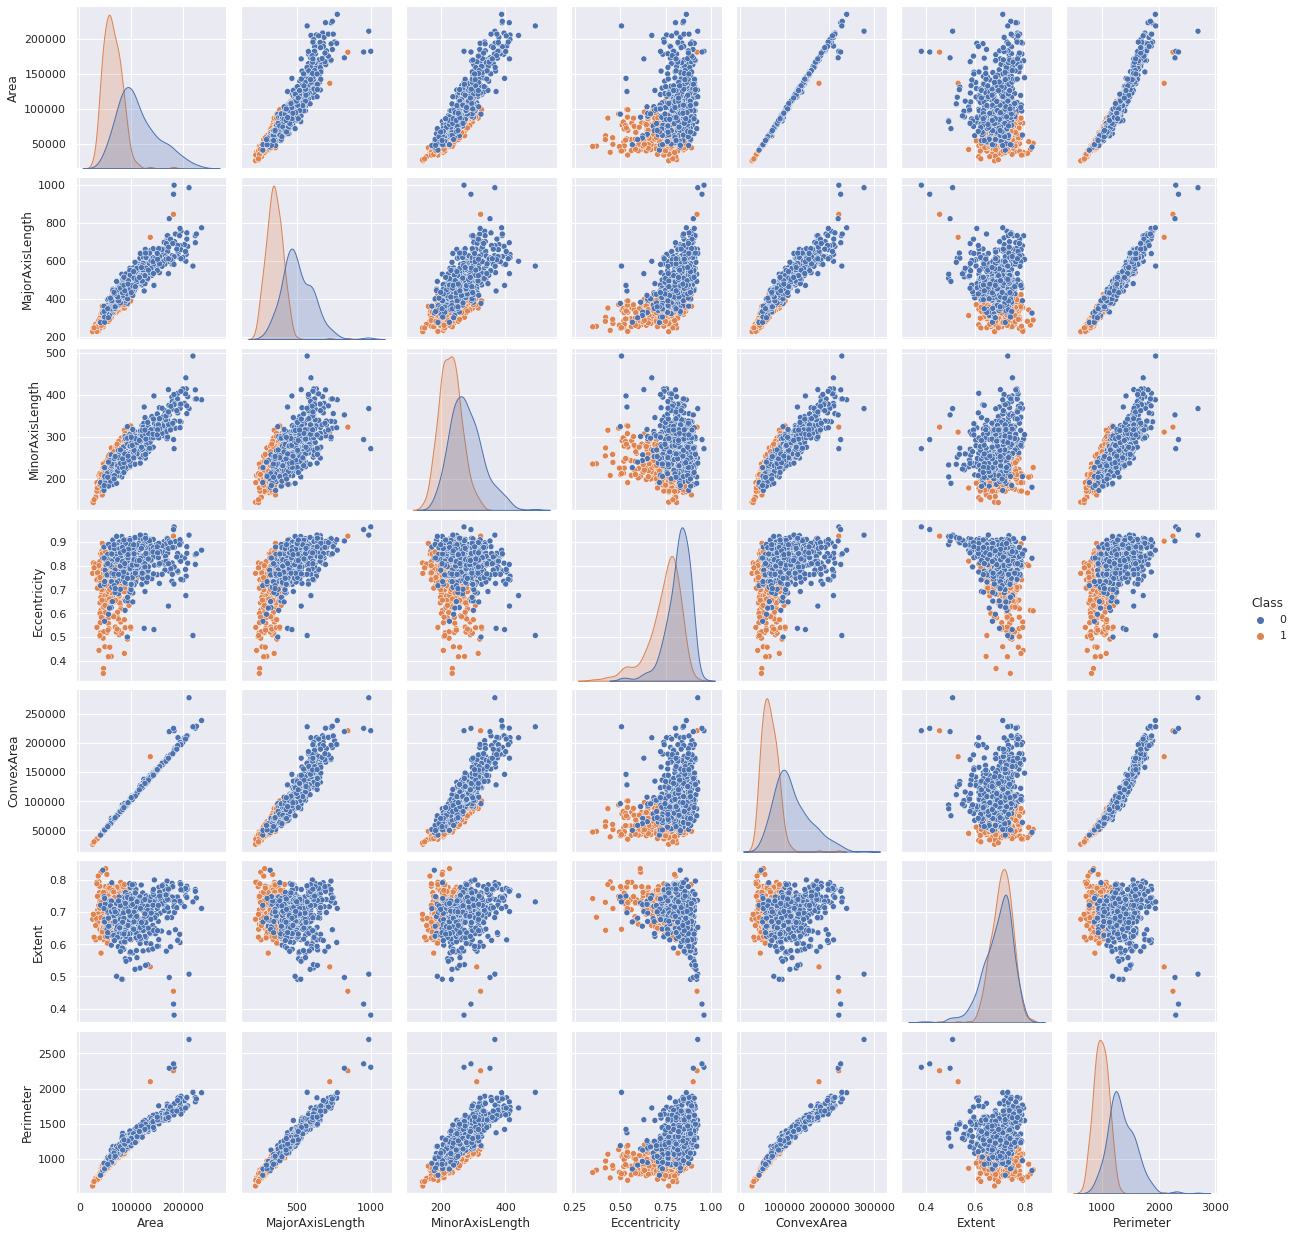

In [13]:
sns.pairplot(df, hue='Class')
plt.show()

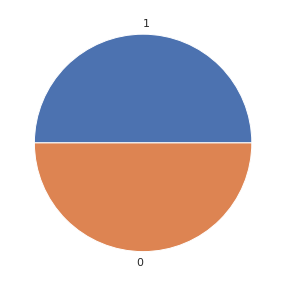

In [14]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [15]:
X = df.drop(columns=['Class'])
X.head(50)
     

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   87524       442.246011       253.291155      0.819738       90546   
1   75166       406.690687       243.032436      0.801805       78789   
2   90856       442.267048       266.328318      0.798354       93717   
3   45928       286.540559       208.760042      0.684989       47336   
4   79408       352.190770       290.827533      0.564011       81463   
5   49242       318.125407       200.122120      0.777351       51368   
6   42492       310.146072       176.131449      0.823099       43904   
7   60952       332.455472       235.429835      0.706058       62329   
8   42256       323.189607       172.575926      0.845499       44743   
9   64380       366.964842       227.771615      0.784056       66125   
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   
20  69726       354.176912       252.529208      0.701161       71849   
21  57346       330.478438       222.443748      0.739555       59365   
22  82028       397.114976       268.333773      0.737169       84427   
23  61251       301.507790       273.659941      0.419754       64732   
24  96277       447.134523       275.216154      0.788128       97865   
25  75620       368.224284       263.459255      0.698627       77493   
26  73167       340.055218       276.015177      0.584106       74545   
27  60847       336.923870       231.465696      0.726660       62492   
28  81021       347.750058       297.640626      0.517135       82552   
29  59902       358.591915       222.902027      0.783332       63250   
30  88745       429.770355       265.690236      0.786009       90715   
31  41809       307.532739       175.085568      0.822114       43838   
32  75329       364.230780       265.866864      0.683510       77541   
33  61600       350.182754       225.842771      0.764243       63397   
34  46427       253.842028       235.906824      0.369212       48275   
35  40861       249.740227       213.573272      0.518328       43096   
36  55827       305.298843       234.661225      0.639696       57724   
37  54182       366.066674       192.013274      0.851391       56450   
38  77468       405.936594       245.989798      0.795479       79220   
39  49882       287.264327       222.185873      0.633852       50880   
40  95245       397.094114       307.273922      0.633422       97988   
41  71464       364.103090       253.796927      0.717026       73265   
42  77055       375.250132       262.812422      0.713784       79255   
43  92384       368.406214       320.714579      0.492087       93772   
44  77310       436.529899       228.280372      0.852367       80138   
45  57580       330.228375       232.055387      0.711475       60232   
46  69708       375.447280       239.132775      0.770924       71321   
47  41502       260.512675       205.865024      0.612810       43114   
48  45800       330.008683       181.665865      0.834843       47802   
49  52623       311.996758       218.041123      0.715261       54175   

      Extent  Perimeter  
0   0.758651   1184.040  
1   0.684130   1121.786  
2   0.637613   1208.575  
3   0.699599    844.162  
4   0.792772   1073.251  
5   0.658456    881.836  
6   0.665894    823.796  
7   0.743598    933.366  
8   0.698031    849.728  
9   0.664376    981.5

In [16]:
X.describe().transpose()

count          mean           std           min  \
Area             900.0  87804.127778  39002.111390  25387.000000   
MajorAxisLength  900.0    430.929950    116.035121    225.629541   
MinorAxisLength  900.0    254.488133     49.988902    143.710872   
Eccentricity     900.0      0.781542      0.090318      0.348730   
ConvexArea       900.0  91186.090000  40769.290132  26139.000000   
Extent           900.0      0.699508      0.053468      0.379856   
Perimeter        900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Area             59348.000000  78902.000000  105028.250000  235047.000000  
MajorAxisLength    345.442898    407.803951     494.187014     997.291941  
MinorAxisLength    219.111126    247.848409     279.888575     492.275279  
Eccentricity         0.741766      0.798846       0.842571       0.962124  
ConvexArea       61513.250000  81651.000000  108375.750000  278217.000000  
Extent               0.670869      0.707367       0.734991       0.835455  
Perimeter          966.410750   1119.509000    1308.389750    2697.753000

In [17]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(50)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  -0.007186         0.097577        -0.023958      0.423142   -0.015709   
1  -0.324217        -0.209012        -0.229292      0.224476   -0.304248   
2   0.078292         0.097758         0.236988      0.186239    0.062113   
3  -1.074286        -1.245051        -0.915273     -1.069623   -1.076165   
4  -0.215393        -0.678958         0.727354     -2.409827   -0.238623   
5  -0.989269        -0.972699        -1.088166     -0.046427   -0.977212   
6  -1.162433        -1.041504        -1.568353      0.460367   -1.160393   
7  -0.688862        -0.849133        -0.381463     -0.836226   -0.708208   
8  -1.168487        -0.929031        -1.639519      0.708518   -1.139802   
9  -0.600920        -0.551563        -0.534746      0.027845   -0.615047   
10 -0.188996         0.159736        -0.443597      0.825322   -0.165071   
11 -1.130801        -1.117591        -1.351801      0.030091   -1.132979   
12 -1.138087        -1.330674        -1.054320     -1.081885   -1.130231   
13 -0.282504        -0.793929         0.737995     -3.001702   -0.302947   
14 -0.349845        -0.371913        -0.132703     -0.137949   -0.352890   
15 -1.391445        -1.460504        -1.736943     -0.156953   -1.359427   
16 -0.593480        -0.240112        -0.960817      0.856193   -0.607832   
17 -0.591120        -0.660823        -0.375005     -0.388491   -0.600616   
18 -1.141832        -1.092048        -1.434657      0.197908   -1.140514   
19 -0.438813        -0.105470        -0.758431      0.822629   -0.461954   
20 -0.463774        -0.661832        -0.039209     -0.890471   -0.474569   
21 -0.781370        -0.866181        -0.641386     -0.465137   -0.780950   
22 -0.148180        -0.291582         0.277128     -0.491566   -0.165881   
23 -0.681191        -1.115991         0.383735     -4.007927   -0.649234   
24  0.217362         0.139730         0.414883      0.072963    0.163913   
25 -0.312570        -0.540703         0.179562     -0.918539   -0.336055   
26 -0.375499        -0.783601         0.430876     -2.187219   -0.408404   
27 -0.691555        -0.810602        -0.460807     -0.607987   -0.704208   
28 -0.174014        -0.717250         0.863721     -2.929129   -0.211897   
29 -0.715798        -0.623762        -0.632214      0.019828   -0.685605   
30  0.024137        -0.009999         0.224216      0.049490   -0.011561   
31 -1.179954        -1.064038        -1.589287      0.449455   -1.162012   
32 -0.320036        -0.575138         0.227752     -1.086004   -0.334876   
33 -0.672238        -0.696273        -0.573353     -0.191641   -0.681997   
34 -1.061484        -1.527007        -0.371915     -4.567828   -1.053120   
35 -1.204274        -1.562376        -0.818934     -2.915908   -1.180222   
36 -0.820338        -1.083301        -0.396847     -1.571384   -0.821223   
37 -0.862538        -0.559308        -1.250469      0.773797   -0.852490   
38 -0.265162        -0.215515        -0.170099      0.154396   -0.293671   
39 -0.972850        -1.238810        -0.646548     -1.636127   -0.989188   
40  0.190887        -0.291762         1.056537     -1.640886    0.166932   
41 -0.419188        -0.576239        -0.013835     -0.714721   -0.439818   
42 -0.275757        -0.480120         0.166615     -0.750632   -0.292812   
43  0.117492        -0.539134         1.325560     -3.206613    0.063463   
44 -0.269215         0.048288        -0.524563      0.784610   -0.271141   
45 -0.775367        -0.868337        -0.449004     -0.776215   -0.759672   
46 -0.464236        -0.478420        -0.307346     -0.117634   -0.487527   
47 -1.187830        -1.469486        -0.973219     -1.869232   -1.179781   
48 -1.077569        -0.870231        -1.457579      0.590472   -1.064728   
49 -0.902533        -1.025546        -0.729507     -0.734265   -0.908323   

      Extent  Perimeter  
0   1.106743   0.066274  
1  -0.287777  -0.161252  
2  -1.158250   0.155945  
3   0.001711  -1.175915  
4

In [18]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Area             900.0  1.894781e-16  1.000556 -1.601242 -0.730010 -0.228374   
MajorAxisLength  900.0  0.000000e+00  1.000556 -1.770279 -0.737144 -0.199413   
MinorAxisLength  900.0 -8.210716e-16  1.000556 -2.217269 -0.708091 -0.132898   
Eccentricity     900.0  6.947529e-16  1.000556 -4.794739 -0.440641  0.191694   
ConvexArea       900.0  6.315935e-17  1.000556 -1.596379 -0.728228 -0.234009   
Extent           900.0  1.436875e-15  1.000556 -5.981678 -0.535921  0.147067   
Perimeter        900.0 -6.315935e-17  1.000556 -1.998568 -0.729119 -0.169574   

                      75%       max  
Area             0.441866  3.777353  
MajorAxisLength  0.545458  4.883667  
MinorAxisLength  0.508404  4.759444  
Eccentricity     0.676084  2.000508  
ConvexArea       0.421867  4.590095  
Extent           0.664006  2.543983  
Perimeter        0.520748  5.598604

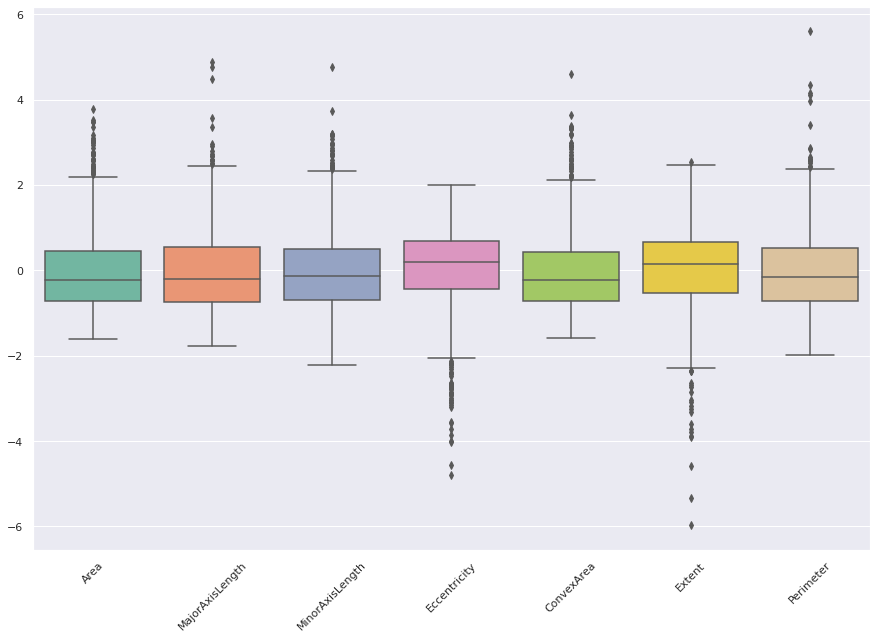

In [19]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

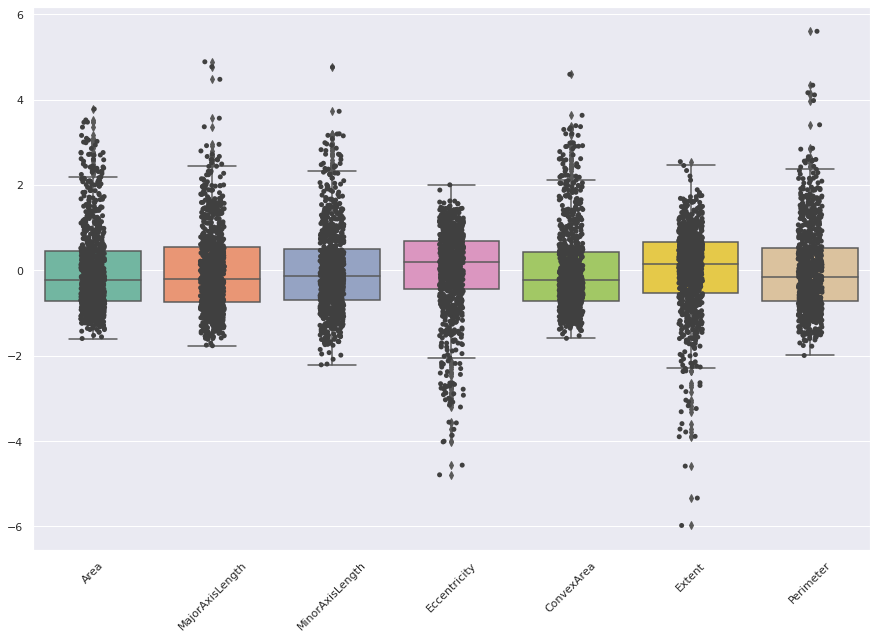

In [20]:
ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [21]:
observations = list(df.index)
variables = list(df.columns)

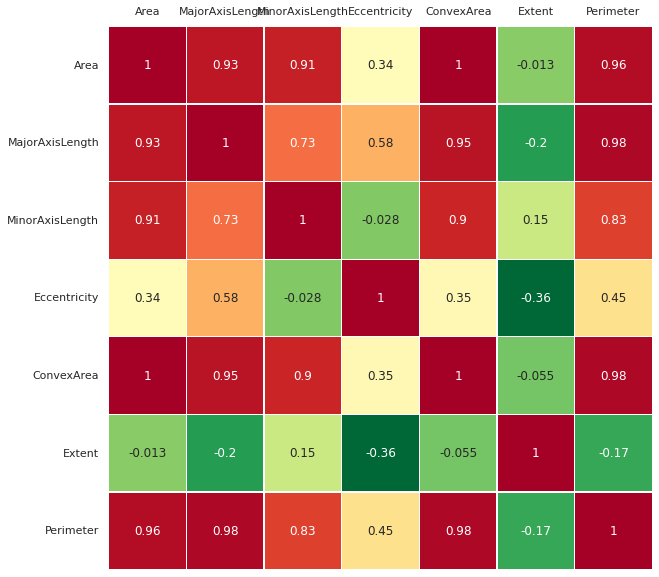

In [22]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);


Text(0, 0.5, 'Z2')

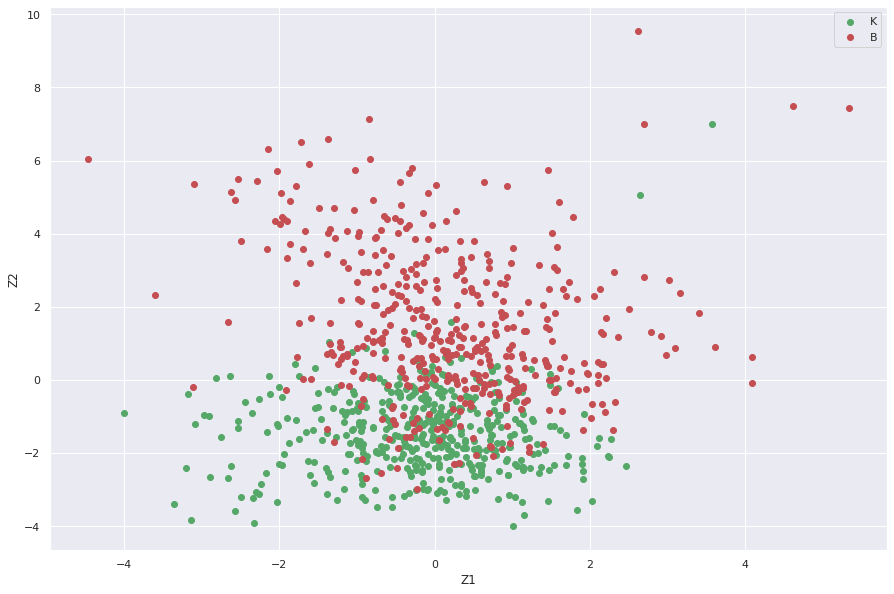

In [23]:
from numpy.lib import index_tricks
pca = PCA()
Z = pca.fit_transform(X)


idx_K= np.where(y == 1)
idx_B= np.where(y == 0)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_K,1], Z[idx_K,0], c='g', label='K')
plt.scatter(Z[idx_B,1], Z[idx_B,0], c='r', label='B')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

array([[ 0.44828422, -0.11609991,  0.00548378, -0.11113906, -0.61104765,
        -0.09983439, -0.62436686],
       [ 0.4432398 ,  0.13658724, -0.10054797,  0.49520464,  0.08757032,
        -0.68557712,  0.22772863],
       [ 0.38938118, -0.37492246,  0.23604354, -0.6558767 ,  0.38457775,
        -0.2390332 ,  0.12995283],
       [ 0.20297098,  0.61082321, -0.62852206, -0.42629865,  0.07510412,
         0.05356014,  0.02044403],
       [ 0.45093833, -0.08761633,  0.0366724 ,  0.0558117 , -0.39241075,
         0.47120104,  0.63914127],
       [-0.05636836, -0.66734439, -0.73198093,  0.10905256,  0.05685884,
         0.02345199, -0.00161639],
       [ 0.45082374,  0.03417227,  0.04430077,  0.3398651 ,  0.5551508 ,
         0.48726906, -0.36399975]])

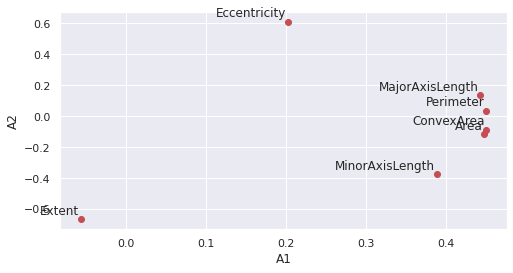

In [24]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


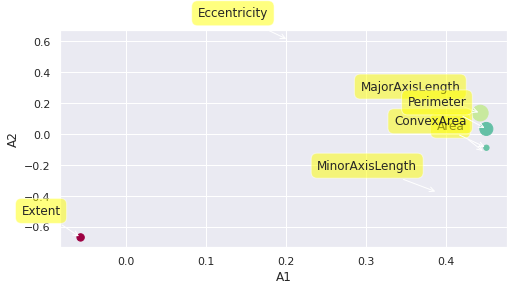

In [25]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

array([4.83766379e+00, 1.45480489e+00, 6.29148522e-01, 5.68877209e-02,
       2.18325269e-02, 6.43734371e-03, 1.01163378e-03])

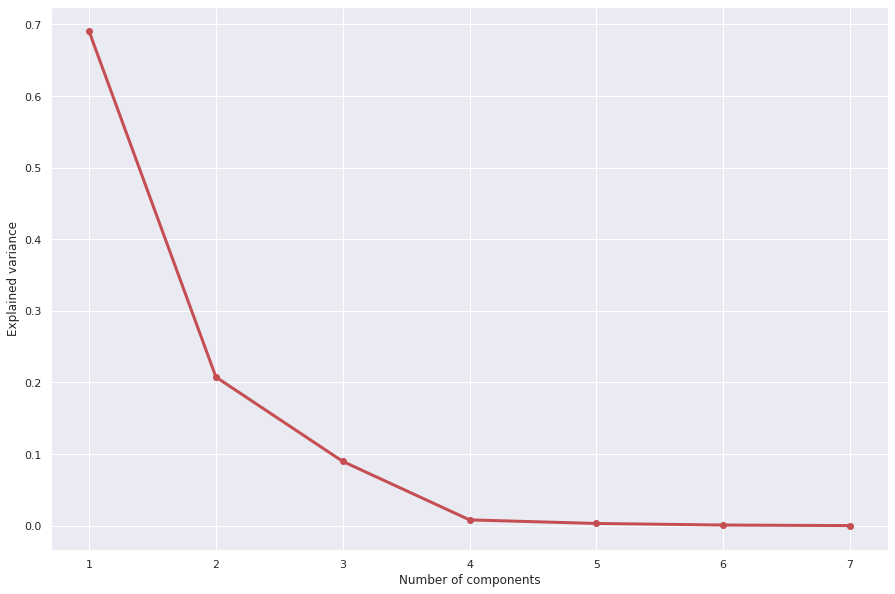

In [26]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda
     

Text(0, 0.5, 'Cumulative explained variance')

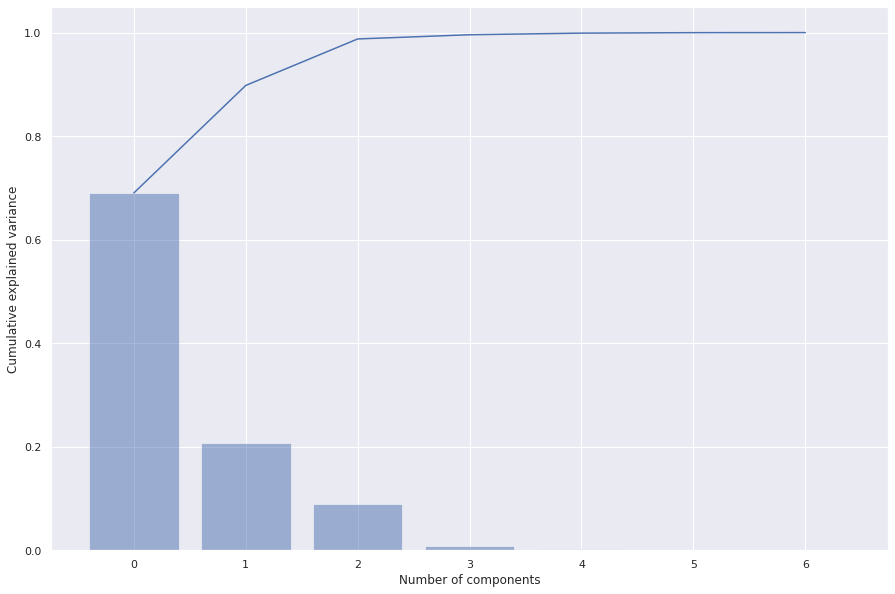

In [27]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([-4.53328089e-01,  4.45368368e-01,  8.02008139e-01, -3.02563631e-01,
       -2.96776301e+00,  9.24411879e-01,  1.34063710e+00, -9.21366416e-01,
        1.13506065e+00,  6.81523300e-01,  1.04556343e+00,  5.90230725e-01,
       -1.53326945e-01, -3.08398943e+00,  2.17438854e-01,  8.09003134e-01,
        2.40283347e-01, -3.24187105e-02,  5.19283272e-01,  4.94038098e-01,
       -9.76196977e-01, -3.33467933e-01, -2.55683878e-01, -1.93447544e+00,
       -1.86304331e-01, -9.84134587e-01, -2.53403074e+00, -1.80985327e-01,
       -2.90990507e+00, -2.72923663e-01, -7.13686609e-01,  9.47521743e-01,
       -1.06642690e+00, -4.74512728e-01, -2.49299302e+00, -2.03607804e+00,
       -8.68979157e-01,  2.11537306e+00, -9.81907359e-02, -1.60187820e+00,
       -2.13918053e+00, -6.38506342e-01, -9.46798550e-01, -3.17041937e+00,
        1.58097964e+00,  3.89889395e-01, -2.88802500e-01, -2.34187568e+00,
        5.55485028e-01,  1.40089791e-01,  1.36318999e+00,  2.13310172e-01,
        1.91845642e+00,  

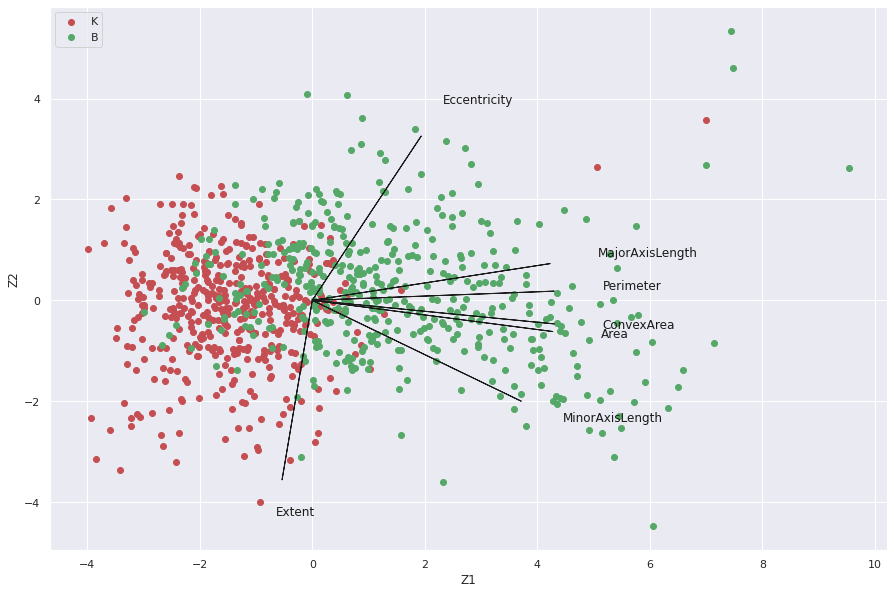

In [29]:

# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_K,0], Z[idx_K,1], c='r', label='K')
plt.scatter(Z[idx_B,0], Z[idx_B,1], c='g', label='B')

plt.legend(loc='upper left')
Z1
Z2
   

In [30]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [32]:
out['PC']

PC1       PC2       PC3
0    0.076994 -0.453328 -1.089214
1   -0.475376  0.445368  0.016372
2    0.372109  0.802008  0.786487
3   -2.622445 -0.302564  0.482721
4   -0.962054 -2.967763  0.452154
..        ...       ...       ...
895 -0.114629  0.694645  0.129914
896  0.273577  0.953934  0.696489
897  0.682451 -1.308199  0.091732
898  0.648410  0.979248  0.091413
899  0.487555  2.108116 -0.191941

[900 rows x 3 columns]

[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6cb3b74250>)

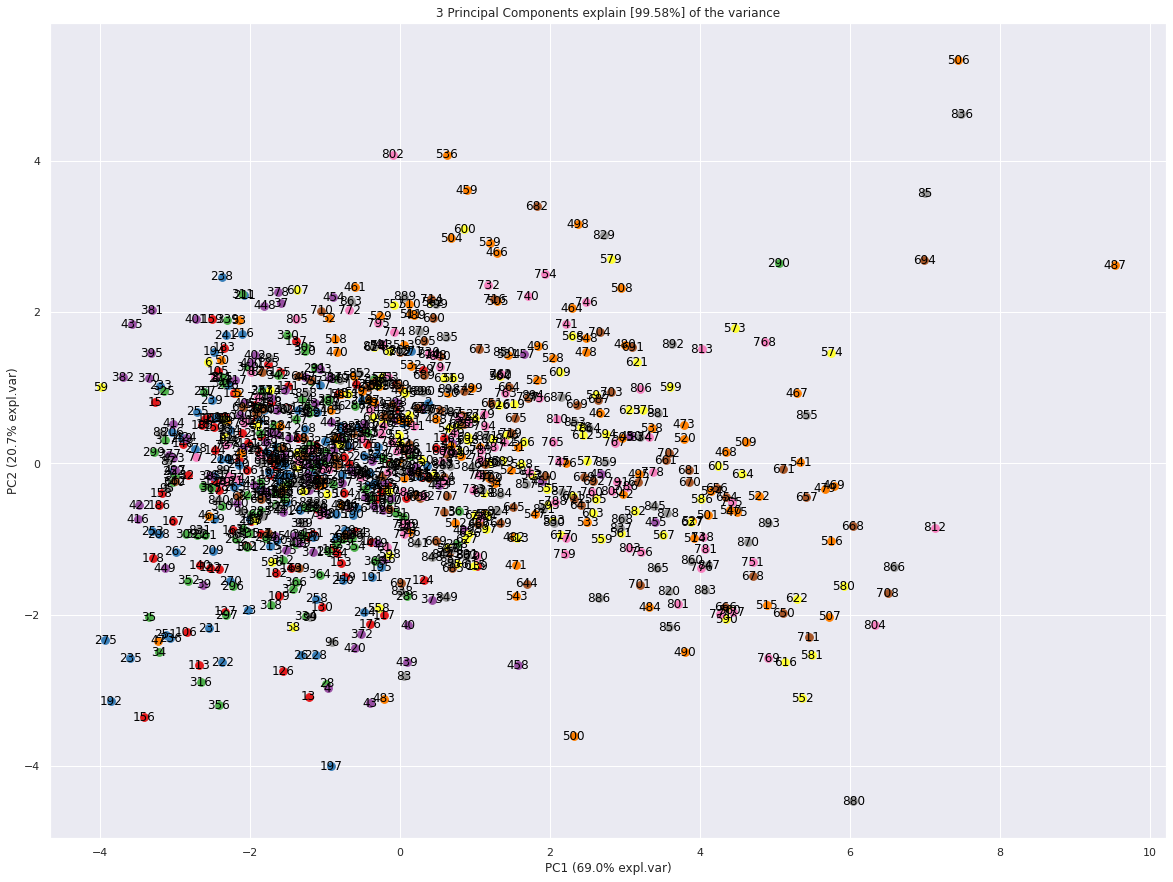

In [33]:
model.scatter(label=True, legend=False)

In [34]:

A = out['loadings'].T
A
   

PC1       PC2       PC3
Area             0.448284 -0.116100  0.005484
MajorAxisLength  0.443240  0.136587 -0.100548
MinorAxisLength  0.389381 -0.374922  0.236044
Eccentricity     0.202971  0.610823 -0.628522
ConvexArea       0.450938 -0.087616  0.036672
Extent          -0.056368 -0.667344 -0.731981
Perimeter        0.450824  0.034172  0.044301

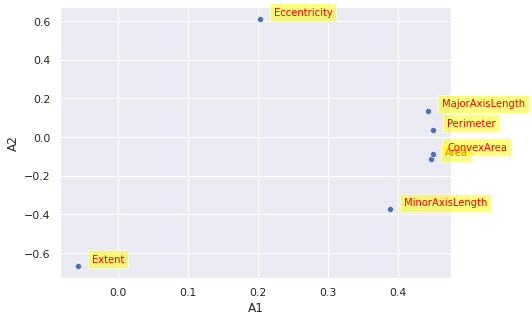

In [35]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

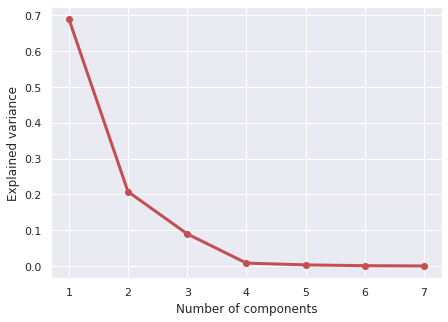

In [36]:

VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

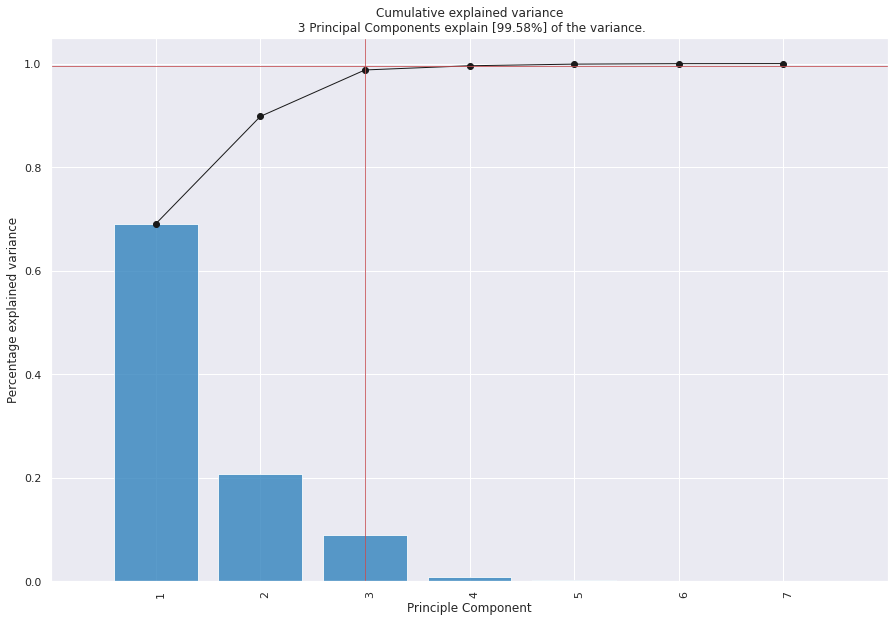

<Figure size 504x360 with 0 Axes>

In [37]:

model.plot();


[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].


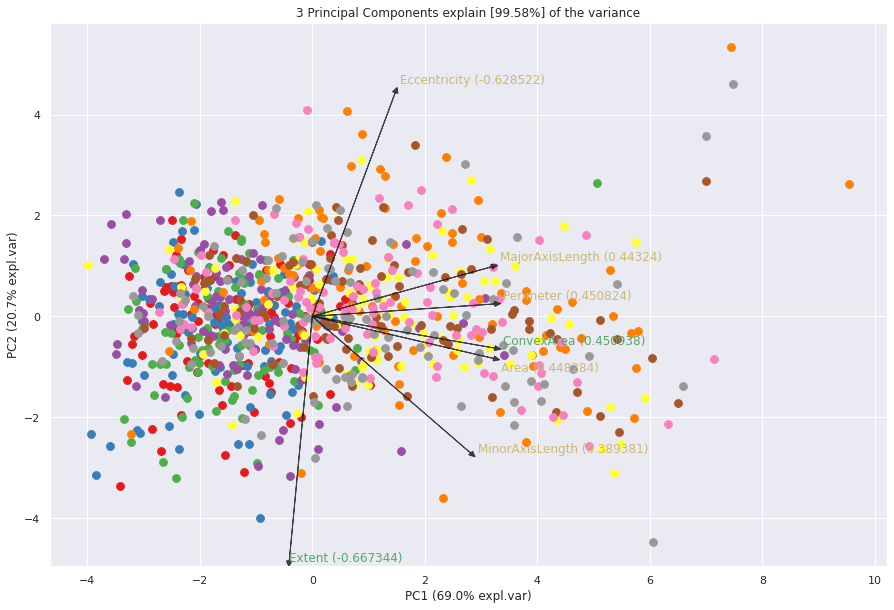

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6cc1c72d60>)

In [38]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].


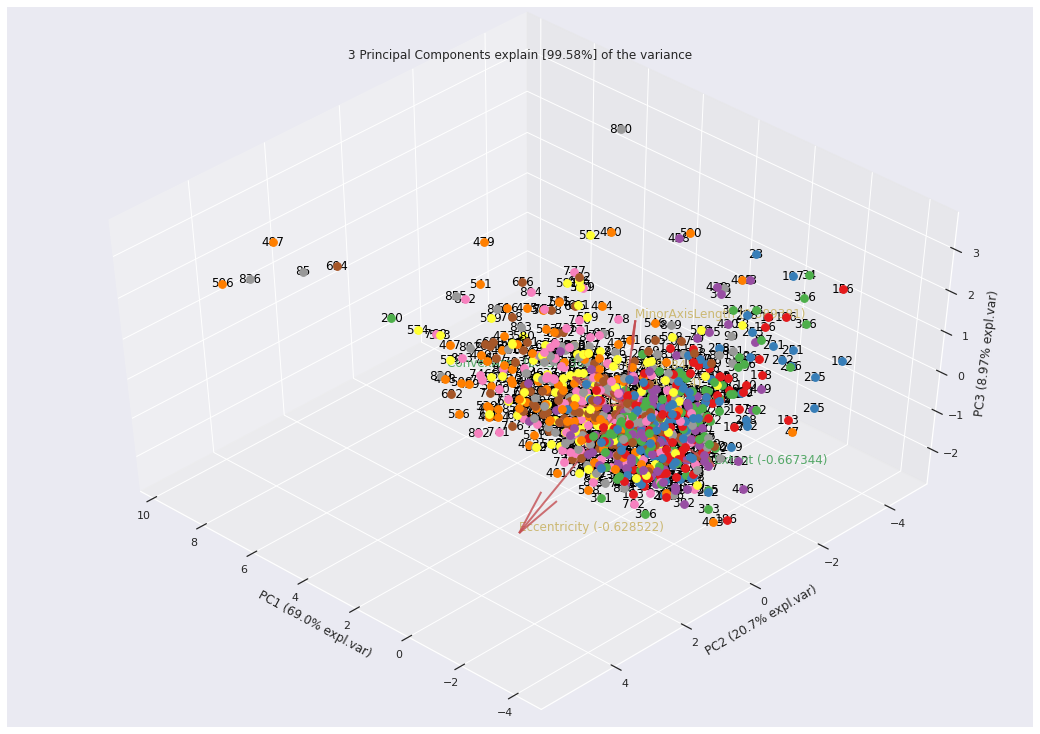

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f6cc1d52d90>)

In [39]:

model.biplot3d(legend=False)

In [40]:
from pycaret.utils import version
version()

'2.3.6'

In [41]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [42]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (810, 8)
Unseen Data For Predictions: (90, 8)


In [43]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (810, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (566, 6)
12                    Transformed Test Set          (244, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f3ad
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [46]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8852  0.9384  0.9071  0.8701   
et                 Extra Trees Classifier    0.8728  0.9296  0.9071  0.8490   
rf               Random Forest Classifier    0.8693  0.9251  0.9143  0.8393   
gbc          Gradient Boosting Classifier    0.8623  0.9229  0.9000  0.8387   
lda          Linear Discriminant Analysis    0.8623  0.9286  0.8643  0.8610   
ridge                    Ridge Classifier    0.8605  0.0000  0.8750  0.8516   
qda       Quadratic Discriminant Analysis    0.8603  0.9239  0.9179  0.8239   
lightgbm  Light Gradient Boosting Machine    0.8568  0.9227  0.8858  0.8364   
ada                  Ada Boost Classifier    0.8534  0.9106  0.8786  0.8351   
nb                            Naive Bayes    0.8377  0.9096  0.9143  0.7916   
knn                K Neighbors Classifier    0.8146  0.8654  0.8429  0.7974   
dt               Decision Tree Classifier    0.8075  0.8074  0.7936  0.8162   
svm                   SVM - Linear Kernel    0.5105  0.0000  0.1107  0.1509   
dummy                    Dummy Classifier    0.5035  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8870  0.7704  0.7736     0.740  
et        0.8761  0.7457  0.7498     0.185  
rf        0.8742  0.7387  0.7439     0.238  
gbc       0.8662  0.7247  0.7310     0.132  
lda       0.8611  0.7245  0.7274     0.015  
ridge     0.8611  0.7210  0.7251     0.013  
qda       0.8675  0.7209  0.7273     0.015  
lightgbm  0.8598  0.7136  0.7160     0.128  
ada       0.8555  0.7069  0.7097     0.104  
nb        0.8480  0.6757  0.6854     0.030  
knn       0.8178  0.6294  0.6334     0.035  
dt        0.8037  0.6148  0.6166     0.021  
svm       0.0868  0.0109  0.0240     0.013  
dummy     0.0000  0.0000  0.0000     0.015

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [47]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8682  0.8214  0.8519  0.8364  0.6839  0.6843
1       0.8947  0.9421  0.9286  0.8667  0.8966  0.7897  0.7916
2       0.8947  0.9631  0.8571  0.9231  0.8889  0.7891  0.7911
3       0.8246  0.9212  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8947  0.9323  0.9286  0.8667  0.8966  0.7897  0.7916
5       0.9474  0.9717  1.0000  0.9062  0.9508  0.8945  0.8995
6       0.8393  0.9298  0.8571  0.8276  0.8421  0.6786  0.6790
7       0.8750  0.9439  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.9464  0.9783  0.9286  0.9630  0.9455  0.8929  0.8934
9       0.8929  0.9337  0.8929  0.8929  0.8929  0.7857  0.7857
Mean    0.8852  0.9384  0.9071  0.8701  0.8870  0.7704  0.7736
SD      0.0396  0.0295  0.0484  0.0525  0.0383  0.0790  0.0777

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [49]:
tuned_lr=tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8682  0.8214  0.8519  0.8364  0.6839  0.6843
1       0.9123  0.9421  0.9643  0.8710  0.9153  0.8248  0.8294
2       0.8947  0.9618  0.8571  0.9231  0.8889  0.7891  0.7911
3       0.8246  0.9212  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8947  0.9323  0.9286  0.8667  0.8966  0.7897  0.7916
5       0.9474  0.9717  1.0000  0.9062  0.9508  0.8945  0.8995
6       0.8393  0.9298  0.8571  0.8276  0.8421  0.6786  0.6790
7       0.8750  0.9439  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.9464  0.9783  0.9286  0.9630  0.9455  0.8929  0.8934
9       0.8929  0.9349  0.8929  0.8929  0.8929  0.7857  0.7857
Mean    0.8869  0.9384  0.9107  0.8706  0.8888  0.7740  0.7774
SD      0.0404  0.0294  0.0511  0.0524  0.0391  0.0806  0.0794

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [50]:
tuned_lr

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [52]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8362  0.8214  0.7667  0.7931  0.5793  0.5808
1       0.8070  0.8411  0.8571  0.7742  0.8136  0.6146  0.6181
2       0.8421  0.9033  0.8571  0.8276  0.8421  0.6843  0.6847
3       0.7368  0.8282  0.7857  0.7097  0.7458  0.4745  0.4771
4       0.7193  0.7599  0.7500  0.7000  0.7241  0.4391  0.4402
5       0.9123  0.9452  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.7321  0.8125  0.7500  0.7241  0.7368  0.4643  0.4646
7       0.8750  0.9018  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.8393  0.9043  0.7500  0.9130  0.8235  0.6786  0.6897
9       0.8929  0.9216  0.9286  0.8667  0.8966  0.7857  0.7877
Mean    0.8146  0.8654  0.8429  0.7974  0.8178  0.6294  0.6334
SD      0.0658  0.0553  0.0833  0.0692  0.0653  0.1313  0.1338

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [53]:
tuned_knn = tune_model(knn)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.8461  0.8571  0.8000  0.8276  0.6494  0.6510
1       0.7895  0.8399  0.8214  0.7667  0.7931  0.5793  0.5808
2       0.8421  0.9224  0.9286  0.7879  0.8525  0.6851  0.6958
3       0.7895  0.8264  0.8571  0.7500  0.8000  0.5799  0.5856
4       0.7368  0.7672  0.7857  0.7097  0.7458  0.4745  0.4771
5       0.8596  0.9384  0.9655  0.8000  0.8750  0.7182  0.7348
6       0.7857  0.8571  0.8214  0.7667  0.7931  0.5714  0.5729
7       0.8393  0.9145  0.8929  0.8065  0.8475  0.6786  0.6825
8       0.8393  0.9260  0.8214  0.8519  0.8364  0.6786  0.6790
9       0.8036  0.8814  0.8929  0.7576  0.8197  0.6071  0.6171
Mean    0.8110  0.8719  0.8644  0.7797  0.8191  0.6222  0.6277
SD      0.0350  0.0517  0.0527  0.0366  0.0354  0.0697  0.0721

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [54]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

In [55]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [56]:
qda=create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8836  0.8571  0.8276  0.8421  0.6843  0.6847
1       0.9123  0.9433  0.9643  0.8710  0.9153  0.8248  0.8294
2       0.8596  0.9397  0.8929  0.8333  0.8621  0.7196  0.7213
3       0.8070  0.9101  0.9286  0.7429  0.8254  0.6156  0.6349
4       0.8772  0.9015  0.9643  0.8182  0.8852  0.7551  0.7669
5       0.9298  0.9840  1.0000  0.8788  0.9355  0.8593  0.8679
6       0.8036  0.8890  0.8929  0.7576  0.8197  0.6071  0.6171
7       0.8393  0.9184  0.8929  0.8065  0.8475  0.6786  0.6825
8       0.9286  0.9643  0.9286  0.9286  0.9286  0.8571  0.8571
9       0.8036  0.9056  0.8571  0.7742  0.8136  0.6071  0.6107
Mean    0.8603  0.9239  0.9179  0.8239  0.8675  0.7209  0.7273
SD      0.0475  0.0312  0.0453  0.0548  0.0436  0.0948  0.0932

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [57]:
tuned_qda=tune_model(qda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8836  0.8214  0.8519  0.8364  0.6839  0.6843
1       0.8947  0.9335  0.9286  0.8667  0.8966  0.7897  0.7916
2       0.8596  0.9581  0.8571  0.8571  0.8571  0.7192  0.7192
3       0.8070  0.9126  0.9286  0.7429  0.8254  0.6156  0.6349
4       0.8947  0.9015  0.9286  0.8667  0.8966  0.7897  0.7916
5       0.9123  0.9803  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8214  0.8801  0.8214  0.8214  0.8214  0.6429  0.6429
7       0.8571  0.9145  0.8929  0.8333  0.8621  0.7143  0.7161
8       0.9286  0.9860  0.9286  0.9286  0.9286  0.8571  0.8571
9       0.8393  0.8865  0.8929  0.8065  0.8475  0.6786  0.6825
Mean    0.8657  0.9237  0.9000  0.8428  0.8692  0.7315  0.7357
SD      0.0382  0.0374  0.0525  0.0455  0.0369  0.0761  0.0750

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [58]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001)

In [59]:
evaluate_model(tuned_qda)


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [60]:
!pip install statsmodels --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Classification + PCA**

In [61]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (810, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (566, 3)
12                    Transformed Test Set          (244, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              587d
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Class')),
                ('fix_perfect', Remove_100(target='Class')),
                ('clean_names', Clean_Colum_Names()),
       

In [62]:
best_model_pca = compare_models()


Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.8604  0.9060  0.9107  0.8263   
lr                    Logistic Regression    0.8570  0.9206  0.8714  0.8472   
ridge                    Ridge Classifier    0.8569  0.0000  0.9179  0.8175   
lda          Linear Discriminant Analysis    0.8569  0.9213  0.9179  0.8175   
lightgbm  Light Gradient Boosting Machine    0.8553  0.9054  0.8828  0.8372   
nb                            Naive Bayes    0.8552  0.9199  0.9179  0.8142   
ada                  Ada Boost Classifier    0.8517  0.9077  0.8895  0.8273   
qda       Quadratic Discriminant Analysis    0.8463  0.9112  0.9071  0.8092   
rf               Random Forest Classifier    0.8429  0.9069  0.8752  0.8218   
gbc          Gradient Boosting Classifier    0.8412  0.9094  0.8680  0.8235   
et                 Extra Trees Classifier    0.8392  0.9171  0.8717  0.8203   
svm                   SVM - Linear Kernel    0.8184  0.0000  0.7980  0.8293   
dt               Decision Tree Classifier    0.8007  0.8004  0.7900  0.8076   
dummy                    Dummy Classifier    0.5035  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
knn       0.8661  0.7211  0.7255     0.024  
lr        0.8572  0.7139  0.7179     0.017  
ridge     0.8641  0.7142  0.7212     0.012  
lda       0.8641  0.7142  0.7212     0.013  
lightgbm  0.8583  0.7107  0.7137     0.046  
nb        0.8626  0.7107  0.7171     0.013  
ada       0.8561  0.7036  0.7076     0.100  
qda       0.8540  0.6930  0.7011     0.012  
rf        0.8466  0.6859  0.6893     0.239  
gbc       0.8439  0.6824  0.6858     0.100  
et        0.8438  0.6786  0.6825     0.197  
svm       0.8081  0.6367  0.6430     0.013  
dt        0.7951  0.6010  0.6052     0.014  
dummy     0.0000  0.0000  0.0000     0.012

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [63]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9002  0.9286  0.7879  0.8525  0.6851  0.6958
1       0.8772  0.8904  0.8929  0.8621  0.8772  0.7545  0.7549
2       0.8772  0.9655  0.8929  0.8621  0.8772  0.7545  0.7549
3       0.8070  0.9317  0.9286  0.7429  0.8254  0.6156  0.6349
4       0.8596  0.8849  0.8929  0.8333  0.8621  0.7196  0.7213
5       0.9298  0.9446  1.0000  0.8788  0.9355  0.8593  0.8679
6       0.8393  0.9082  0.8929  0.8065  0.8475  0.6786  0.6825
7       0.8929  0.9267  0.9286  0.8667  0.8966  0.7857  0.7877
8       0.9286  0.9528  0.9643  0.9000  0.9310  0.8571  0.8593
9       0.8571  0.9184  0.8929  0.8333  0.8621  0.7143  0.7161
Mean    0.8711  0.9223  0.9214  0.8373  0.8767  0.7424  0.7475
SD      0.0369  0.0255  0.0350  0.0448  0.0336  0.0733  0.0707

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [65]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [66]:
lr_pca = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7544  0.8547  0.7500  0.7500  0.7500  0.5086  0.5086
1       0.8947  0.9224  0.9286  0.8667  0.8966  0.7897  0.7916
2       0.8596  0.9446  0.7857  0.9167  0.8462  0.7185  0.7257
3       0.8421  0.9015  0.9286  0.7879  0.8525  0.6851  0.6958
4       0.8246  0.8916  0.8214  0.8214  0.8214  0.6490  0.6490
5       0.9123  0.9803  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8750  0.9324  0.8571  0.8889  0.8727  0.7500  0.7505
7       0.8393  0.9235  0.8929  0.8065  0.8475  0.6786  0.6825
8       0.9107  0.9592  0.9286  0.8966  0.9123  0.8214  0.8220
9       0.8571  0.8954  0.8214  0.8846  0.8519  0.7143  0.7161
Mean    0.8570  0.9206  0.8714  0.8472  0.8572  0.7139  0.7179
SD      0.0445  0.0346  0.0735  0.0511  0.0468  0.0890  0.0905

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [67]:
tuned_lr_pca = tune_model(lr_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8559  0.8214  0.7667  0.7931  0.5793  0.5808
1       0.8947  0.9212  0.9286  0.8667  0.8966  0.7897  0.7916
2       0.8772  0.9483  0.8214  0.9200  0.8679  0.7539  0.7581
3       0.8421  0.8990  0.9286  0.7879  0.8525  0.6851  0.6958
4       0.8246  0.8929  0.8214  0.8214  0.8214  0.6490  0.6490
5       0.9123  0.9815  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8750  0.9324  0.8571  0.8889  0.8727  0.7500  0.7505
7       0.8393  0.9222  0.8929  0.8065  0.8475  0.6786  0.6825
8       0.9286  0.9605  0.9643  0.9000  0.9310  0.8571  0.8593
9       0.8571  0.8954  0.8214  0.8846  0.8519  0.7143  0.7161
Mean    0.8640  0.9209  0.8857  0.8496  0.8655  0.7281  0.7321
SD      0.0400  0.0350  0.0635  0.0489  0.0403  0.0798  0.0810

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [68]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8996  0.8571  0.7500  0.8000  0.5799  0.5856
1       0.8596  0.8879  0.8929  0.8333  0.8621  0.7196  0.7213
2       0.8947  0.9464  0.8571  0.9231  0.8889  0.7891  0.7911
3       0.8246  0.9335  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8246  0.8910  0.8571  0.8000  0.8276  0.6494  0.6510
5       0.8421  0.9089  0.9310  0.7941  0.8571  0.6831  0.6940
6       0.8214  0.9273  0.8571  0.8000  0.8276  0.6429  0.6445
7       0.8393  0.9216  0.8214  0.8519  0.8364  0.6786  0.6790
8       0.8929  0.9598  0.8929  0.8929  0.8929  0.7857  0.7857
9       0.8036  0.8948  0.8214  0.7931  0.8070  0.6071  0.6075
Mean    0.8392  0.9171  0.8717  0.8203  0.8438  0.6786  0.6825
SD      0.0330  0.0234  0.0368  0.0522  0.0297  0.0657  0.0647

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [70]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8596  0.8929  0.8065  0.8475  0.6847  0.6885
1       0.8772  0.9261  0.8929  0.8621  0.8772  0.7545  0.7549
2       0.8421  0.9360  0.8214  0.8519  0.8364  0.6839  0.6843
3       0.8421  0.9015  0.9286  0.7879  0.8525  0.6851  0.6958
4       0.8772  0.8855  0.9286  0.8387  0.8814  0.7548  0.7590
5       0.9123  0.9680  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8571  0.9324  0.8929  0.8333  0.8621  0.7143  0.7161
7       0.8571  0.9235  0.8929  0.8333  0.8621  0.7143  0.7161
8       0.9464  0.9605  1.0000  0.9032  0.9492  0.8929  0.8980
9       0.8571  0.9069  0.8214  0.8846  0.8519  0.7143  0.7161
Mean    0.8711  0.9200  0.9071  0.8454  0.8741  0.7423  0.7466
SD      0.0325  0.0312  0.0580  0.0323  0.0335  0.0648  0.0663

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [71]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [72]:
evaluate_model(tuned_et_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [73]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


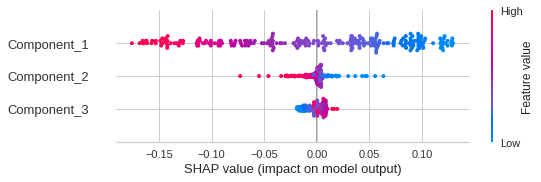

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [75]:
interpret_model(tuned_et_pca, plot='summary')

In [76]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [77]:
interpret_model(tuned_et_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
